In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline


In [5]:
import sys
sys.executable

'/home/manish/anaconda2/bin/python'

In [12]:
train_df = pd.read_csv("data/mnist/train.csv")
test_df = pd.read_csv("data/mnist/test.csv")

In [14]:
df = pd.DataFrame(train_df)
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_df_X = train_df.drop("label",axis =1)

In [21]:
X_train = train_df_X.values
X_test  = test_df.values
y_train = train_df["label"].values

X_train.shape

(42000, 784)

In [19]:
X_train_images = X_train.reshape(-1,28,28)
X_train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

3


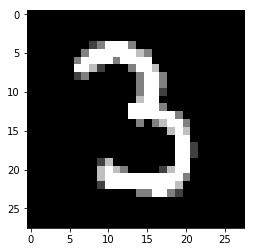

In [23]:
random_index = np.random.randint(0,len(y_train))

plt.imshow(X_train_images[random_index],cmap="gray")

print y_train[random_index]

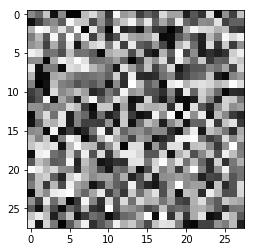

In [24]:
abc = np.random.randint(0,255,(28,28))

plt.imshow(abc, cmap="gray")

In [25]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [26]:
def create_model():
    
    m =Sequential()
    m.add(Dense(16,input_dim =784,activation="relu"))
    m.add(Dense(16,activation="relu"))
    m.add(Dense(10,activation="softmax"))
    
    return m

In [29]:
model = create_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss="mse",optimizer=SGD(lr=0.001),metrics=["acc"])

In [33]:
from keras.utils import np_utils

y_lh = np_utils.to_categorical(y_train)

y_lh

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [32]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [37]:
history = model.fit(X_train,y_lh, epochs=50,batch_size=200)

Epoch 1/50
42000/42000 [==============================] - 2s 43us/step - loss: 0.1232 - acc: 0.3639
Epoch 2/50
42000/42000 [==============================] - 2s 39us/step - loss: 0.1231 - acc: 0.3644
Epoch 3/50
42000/42000 [==============================] - 2s 39us/step - loss: 0.1230 - acc: 0.3644
Epoch 4/50
42000/42000 [==============================] - 2s 42us/step - loss: 0.1229 - acc: 0.3644
Epoch 5/50
42000/42000 [==============================] - 2s 41us/step - loss: 0.1229 - acc: 0.3647
Epoch 6/50
42000/42000 [==============================] - 2s 40us/step - loss: 0.1228 - acc: 0.3650
Epoch 7/50
42000/42000 [==============================] - 2s 39us/step - loss: 0.1227 - acc: 0.3652
Epoch 8/50
42000/42000 [==============================] - 2s 39us/step - loss: 0.1227 - acc: 0.3651
Epoch 9/50
42000/42000 [==============================] - 2s 39us/step - loss: 0.1226 - acc: 0.3652
Epoch 10/50
42000/42000 [==============================] - 2s 39us/step - loss: 0.1225 - acc: 0.3658

In [40]:
def  vis(h):
    
    loss = h.history["loss"]
    plt.plot(loss)
    plt.grid()

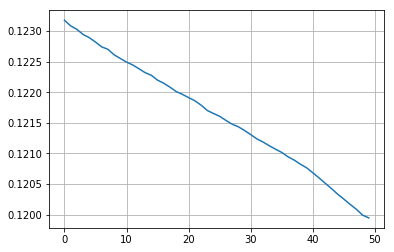

In [41]:
vis(history)

In [46]:


#model.predict(X_test[0].reshape(784,))